# IFCAPOL demo

IFCAPOL is a Python3 implementation of the Matched Filter (MF) and Filtered Fusion (FF, [Argüeso et al. (2009) MNRAS 395, 649–656](https://doi.org/10.1111/j.1365-2966.2009.14549.x)) techniques for the detection/estimation of polarized compact sources in CMB maps. This version of the code is specifically tailored for the LiteBIRD experiment.

- GitLab project at [https://gitlab.com/HerranzD/ifcapol-litebird.git](https://gitlab.com/HerranzD/ifcapol-litebird.git)
- Code documentation will be hosted at readthedocs.org in due time.


In [1]:
from testing import *
import IFCAPOL as pol

%matplotlib inline

## Testing

We use for testing purposes the map based simulations created by the Foregrounds JSG. In particular, this demo uses one of the 40GHz simulations belonging to the **PTEP_20200915_compsep** run.

### Simulated maps:

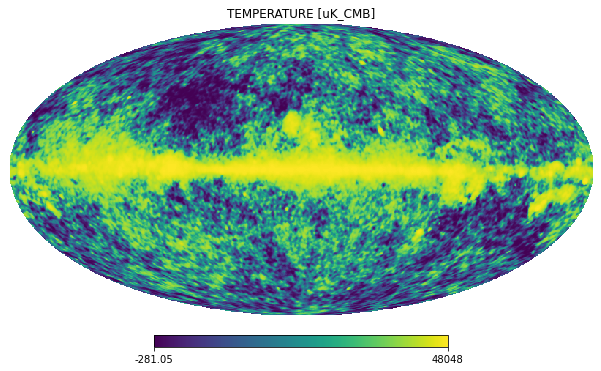

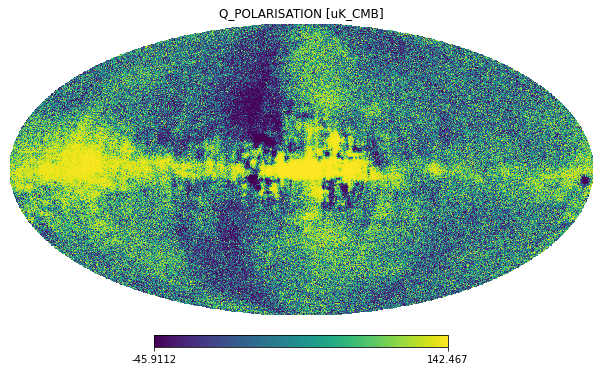

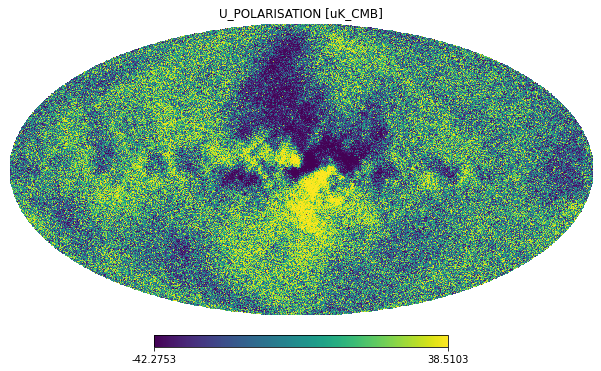

In [2]:
total[0].moll();
total[1].moll();
total[2].moll();

### Simulated radio sources:

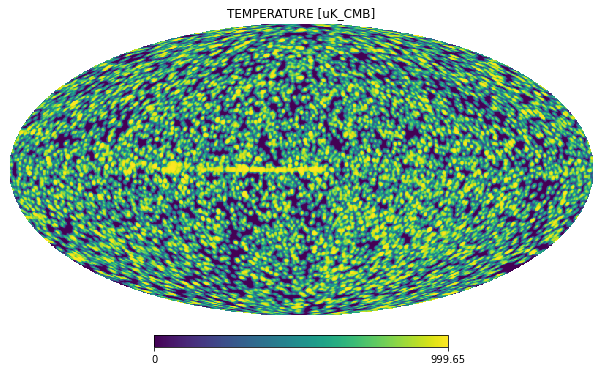

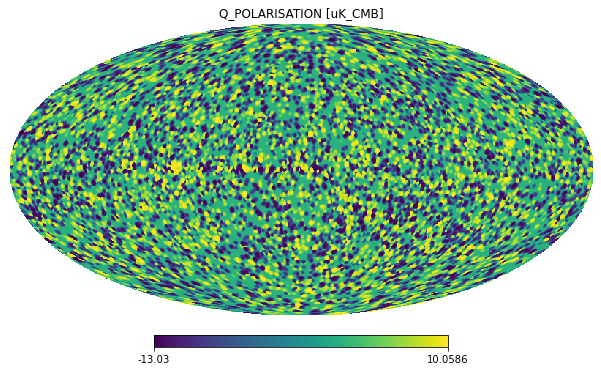

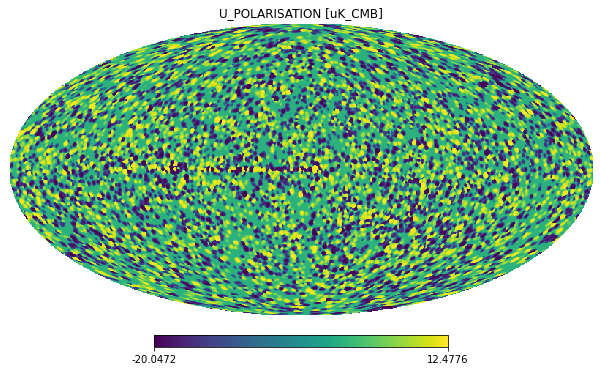

In [3]:
radiops[0].moll();
radiops[1].moll();
radiops[2].moll();

### Testing on the position of a bright source outside the Galactic Plane

In [4]:
coord = total.pixel_to_coordinates(epeaks['Ipix'][10])
print(coord.galactic)

<SkyCoord (Galactic): (l, b) in deg
    (39.69, 43.00863399)>


In [5]:
input_source   = pol.Source.from_coordinate(radiops,coord)
IFCAPOL_source = pol.Source.from_coordinate(total,coord)

- This is the input source:

In [6]:
print('Source GLON = {0} deg'.format(input_source.coord.galactic.l.deg))
print('Source GLAT = {0} deg'.format(input_source.coord.galactic.b.deg))
print('Source I at its peak = {0} uK'.format(input_source.diccio['Patch I'].datos[64,64]))
print('Source Q at its peak = {0} uK'.format(input_source.diccio['Patch Q'].datos[64,64]))
print('Source U at its peak = {0} uK'.format(input_source.diccio['Patch U'].datos[64,64]))
print('Source P at its peak = {0} uK'.format(np.sqrt(input_source.diccio['Patch Q'].datos[64,64]**2+input_source.diccio['Patch U'].datos[64,64]**2)))

Source GLON = 39.69 deg
Source GLAT = 43.008633994236924 deg
Source I at its peak = 205.0056915283203 uK
Source Q at its peak = -0.30109360814094543 uK
Source U at its peak = -6.474612236022949 uK
Source P at its peak = 6.4816094427018225 uK


- This is the estimated photometry of the source:

In [7]:
print('Estimated source I = {0} +- {1} uK'.format(IFCAPOL_source.I.value,IFCAPOL_source.I.error))
print('Estimated source Q = {0} +- {1} uK'.format(IFCAPOL_source.Q.value,IFCAPOL_source.Q.error))
print('Estimated source U = {0} +- {1} uK'.format(IFCAPOL_source.U.value,IFCAPOL_source.U.error))
print('Estimated source P = {0} +- {1} uK'.format(IFCAPOL_source.P.value,IFCAPOL_source.U.error))

Estimated source I = 213.70400537998492 +- 25.70674885577247 uK
Estimated source Q = -1.324249023289836 +- 1.6859137465071325 uK
Estimated source U = -5.353167299574299 +- 1.265595594363694 uK
Estimated source P = 5.360668251427659 +- 1.265595594363694 uK
